In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to match the input shape for CNN (28x28x1)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.8874 - loss: 0.3572
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9859 - loss: 0.0471
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9890 - loss: 0.0331
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9916 - loss: 0.0256
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9937 - loss: 0.0195
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9948 - loss: 0.0154
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9962 - loss: 0.0113
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9968 - loss: 0.0100
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9969 - loss: 0.0092
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 33ms/step - accuracy: 0.9973 - loss: 0.0082


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9870 - loss: 0.0537
Test accuracy: 0.9905999898910522


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


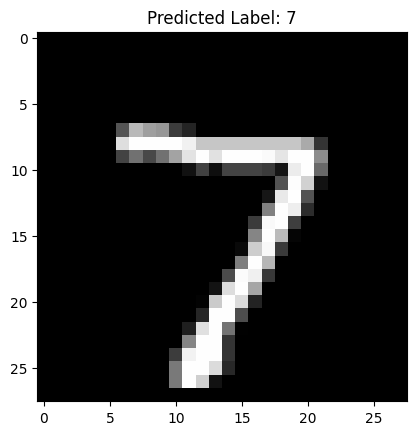

In [6]:
predictions = model.predict(x_test)

# Show the first test image and its predicted label
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predictions[0].argmax()}")
plt.show()

In [4]:
model.save("mnist_digit_model.h5")